In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [24]:
df=pd.read_csv(r"C:\Users\sripa\OneDrive\Desktop\diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
col_list=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in col_list:
    df[i]=df[i].replace(0,np.nan)
    mean=int(df[i].mean(skipna=True))
    df[i]=df[i].replace(np.nan,mean)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [27]:
df.isnull().sum().sum()

np.int64(0)

In [40]:
x=df.iloc[:,:8]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47


In [41]:
y=df.iloc[:,-1]
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


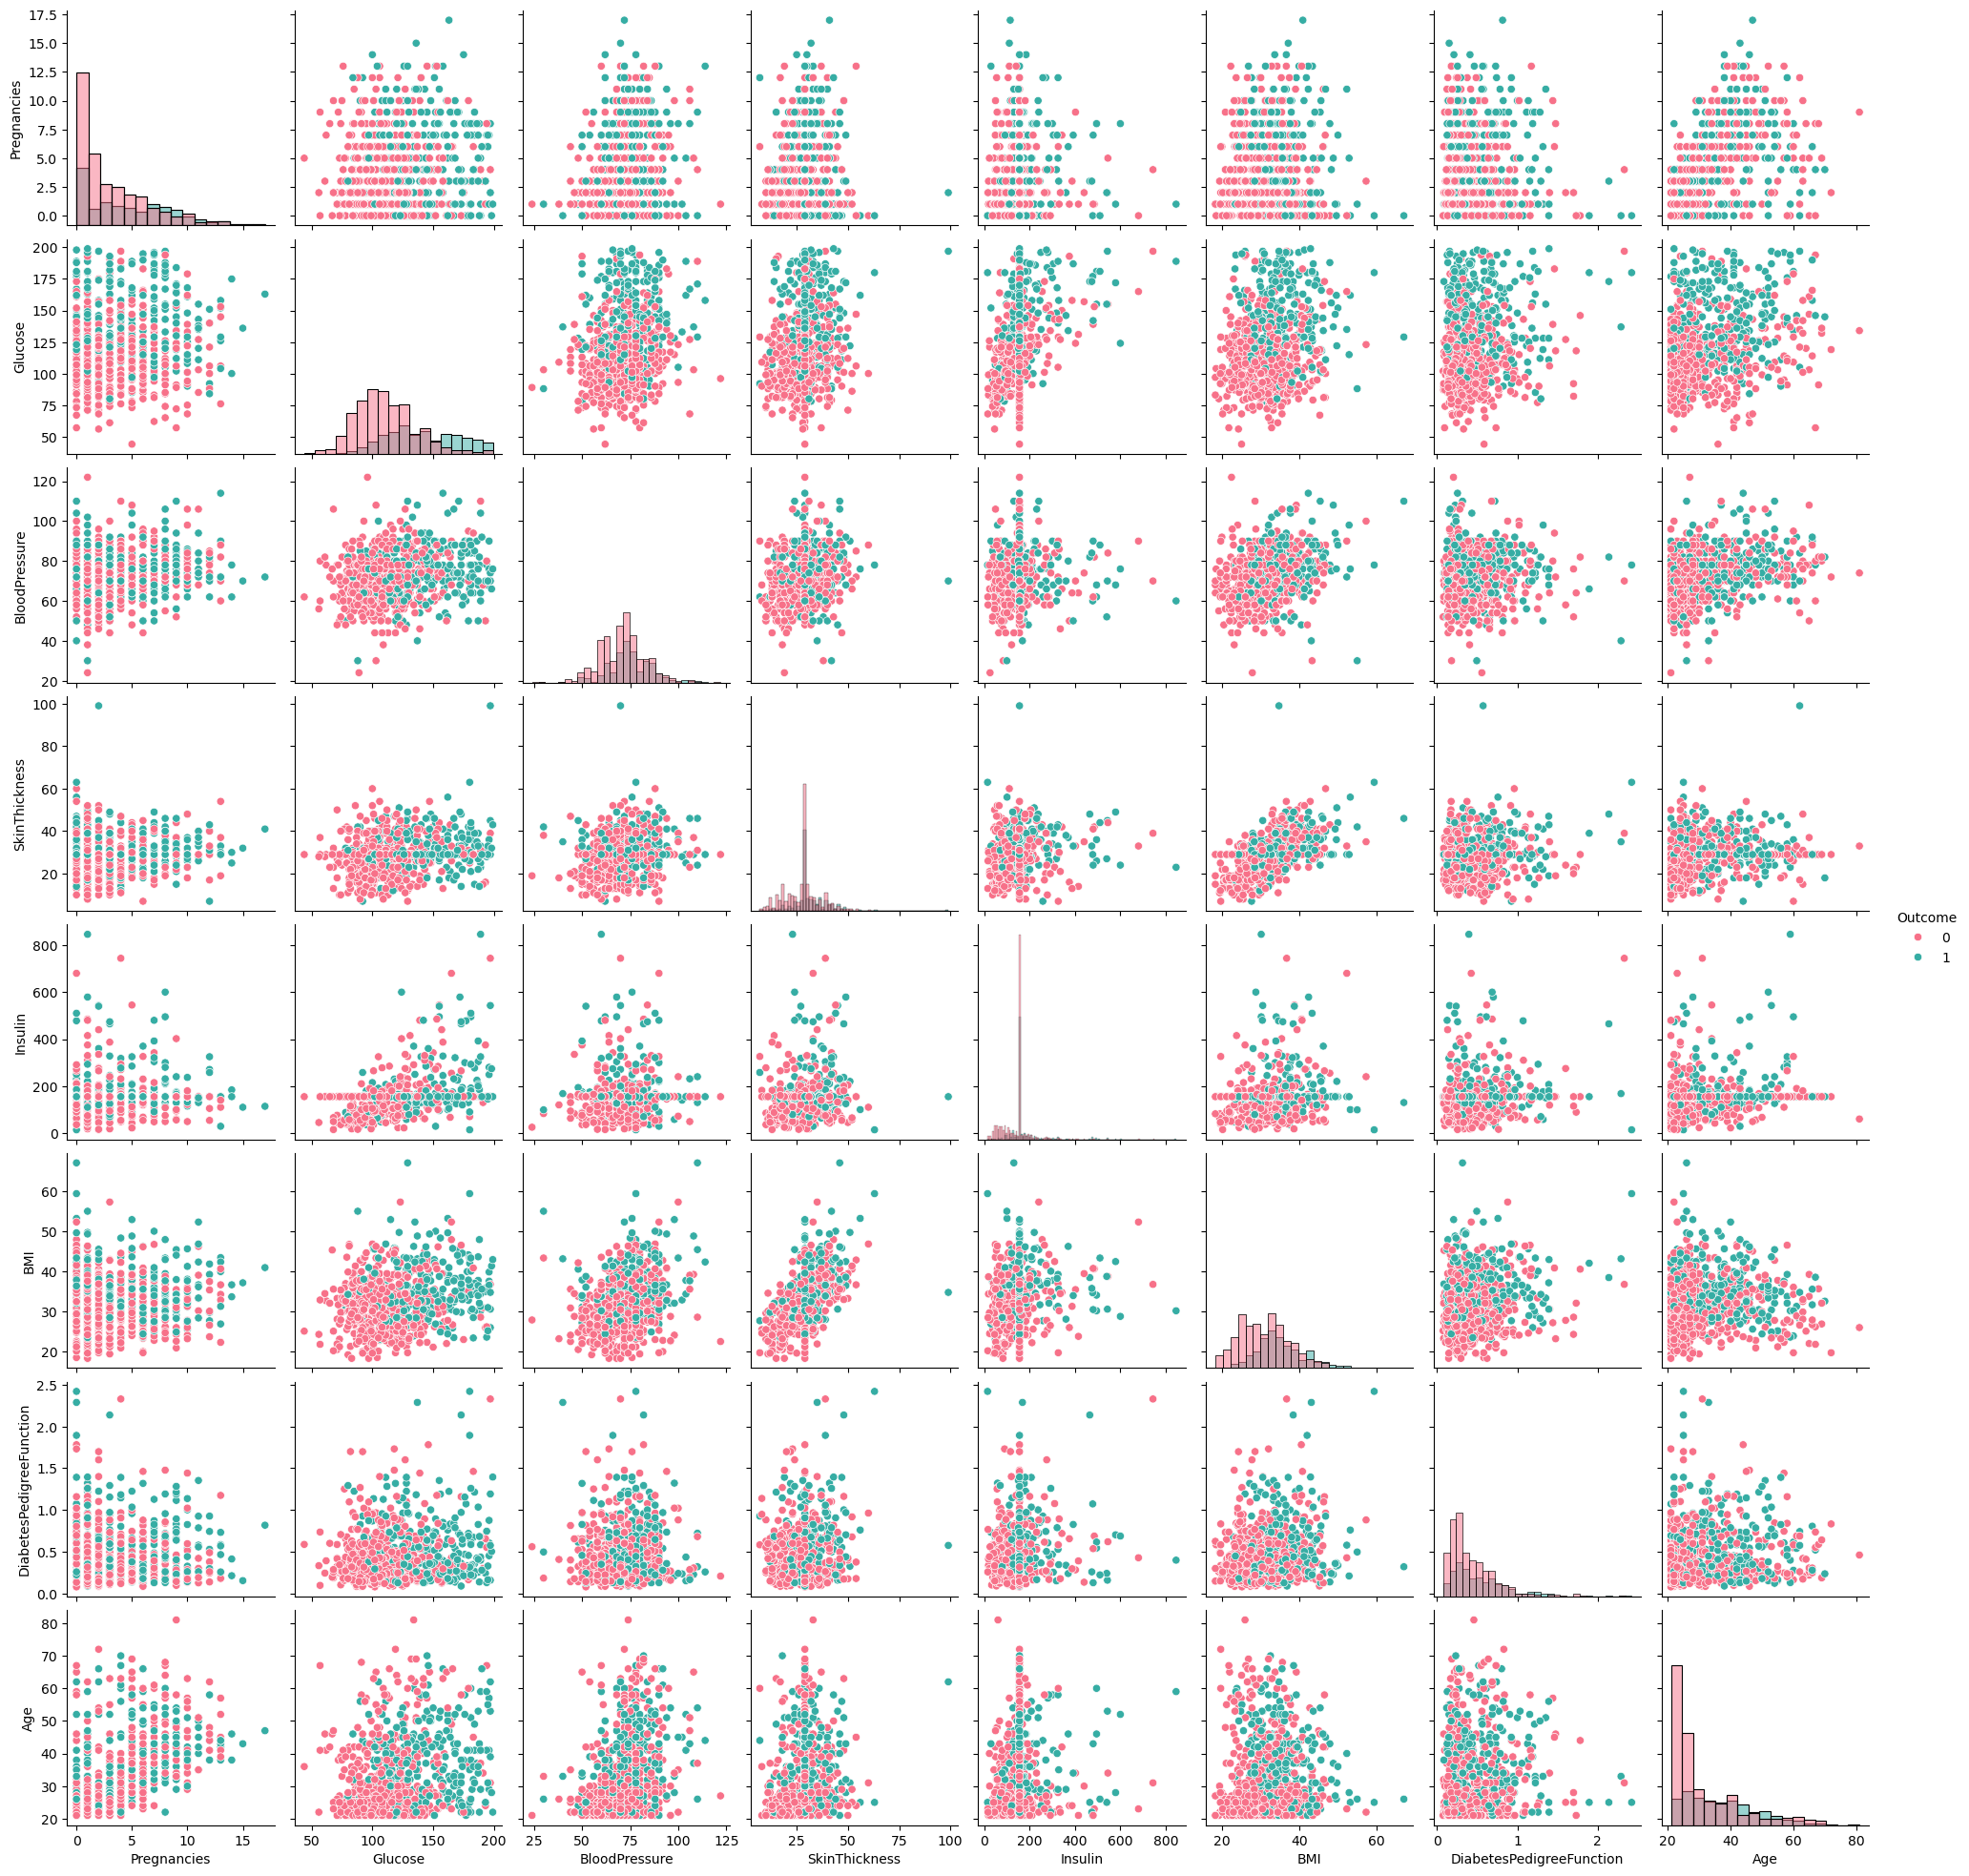

In [53]:
sns.pairplot(data=df,hue='Outcome',kind='scatter',diag_kind='hist',palette='husl')

In [43]:
# from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:

train_score_list=[]
test_score_list=[]
k_range=range(1,20)
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    
    y_pred_train=knn.predict(x_train)
    y_pred_test=knn.predict(x_test)
    
    accuracy1=accuracy_score(y_train,y_pred_train)
    accuracy2=accuracy_score(y_test,y_pred_test)
    
    train_score_list.append(accuracy1)
    test_score_list.append(accuracy2)
    
    print("k=%d,train accuracy = %.2f%%" % (k,accuracy1 * 100 ))
    print("k=%d,test accuracy = %.2f%%" % (k,accuracy2 * 100 ))

k=1,train accuracy = 100.00%
k=1,test accuracy = 65.58%
k=2,train accuracy = 83.71%
k=2,test accuracy = 72.08%
k=3,train accuracy = 85.34%
k=3,test accuracy = 72.73%
k=4,train accuracy = 79.32%
k=4,test accuracy = 76.62%
k=5,train accuracy = 79.48%
k=5,test accuracy = 75.32%
k=6,train accuracy = 76.71%
k=6,test accuracy = 76.62%
k=7,train accuracy = 77.20%
k=7,test accuracy = 75.97%
k=8,train accuracy = 78.50%
k=8,test accuracy = 76.62%
k=9,train accuracy = 78.01%
k=9,test accuracy = 75.32%
k=10,train accuracy = 77.36%
k=10,test accuracy = 75.32%
k=11,train accuracy = 76.71%
k=11,test accuracy = 75.97%
k=12,train accuracy = 76.71%
k=12,test accuracy = 75.97%
k=13,train accuracy = 76.38%
k=13,test accuracy = 78.57%
k=14,train accuracy = 76.38%
k=14,test accuracy = 79.22%
k=15,train accuracy = 77.04%
k=15,test accuracy = 77.27%
k=16,train accuracy = 77.04%
k=16,test accuracy = 75.32%
k=17,train accuracy = 75.57%
k=17,test accuracy = 76.62%
k=18,train accuracy = 75.57%
k=18,test accuracy 

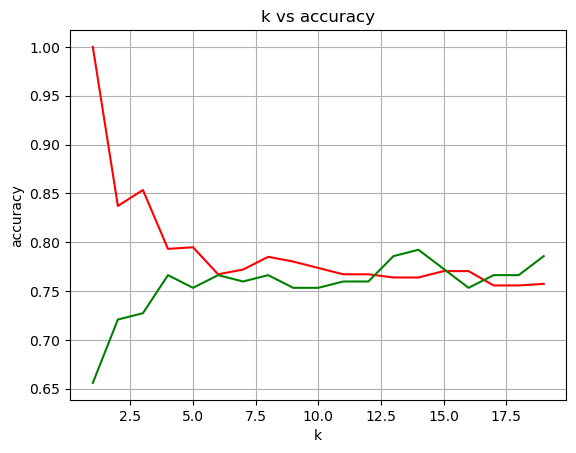

In [45]:
plt.plot(k_range,train_score_list,color='red')
plt.plot(k_range,test_score_list,color='green')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title("k vs accuracy")
plt.grid()
plt.show()

In [46]:

knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)


# knn=KNeighborsClassifier(n_neighbors=k)
# knn.fit(x_train,y_train)
# y_pred_train=knn.predict(x_train)
# y_pred_test=knn.predict(x_test)

In [47]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.7671009771986971
0.7662337662337663


In [48]:
# from sklearn.metrics import classification_report
cr=classification_report(y_train,y_pred_train)
print(cr)
cr1=classification_report(y_test,y_pred_test)
print(cr1)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       393
           1       0.77      0.50      0.61       221

    accuracy                           0.77       614
   macro avg       0.77      0.71      0.72       614
weighted avg       0.77      0.77      0.75       614

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       107
           1       0.63      0.55      0.59        47

    accuracy                           0.77       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.77      0.76       154



In [49]:

# from sklearn.metrics import confusion_matrix

cm_train=confusion_matrix(y_train,y_pred_train)
print("confusion Matrix (train):")
print(cm_train)

cm_test=confusion_matrix(y_test,y_pred_test)
print("confusion Matrix (test):")
print(cm_test)

confusion Matrix (train):
[[361  32]
 [111 110]]
confusion Matrix (test):
[[92 15]
 [21 26]]


Text(50.722222222222214, 0.5, 'Truth')

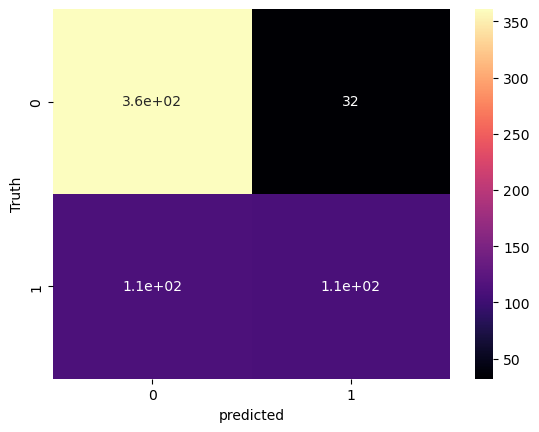

In [50]:
sns.heatmap(cm_train,annot=True,cmap='magma')
plt.xlabel("predicted")
plt.ylabel("Truth")


Text(50.722222222222214, 0.5, 'Truth')

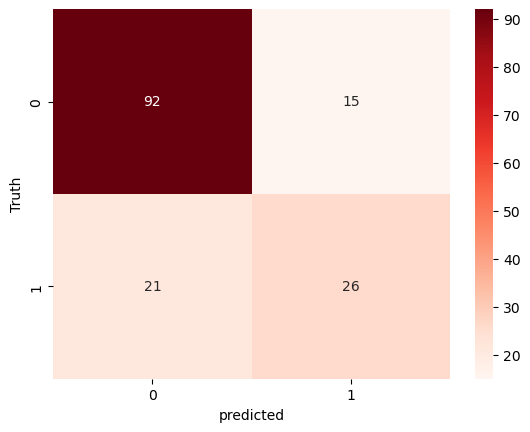

In [51]:
sns.heatmap(cm_test,annot=True,cmap='Reds')
plt.xlabel("predicted")
plt.ylabel("Truth")
